In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.utils import resample
import os

In [2]:
# Llegim el nom dels nodes.
# Obrim el fitxer '.txt' i  llegim les linies.
with open('mindboggle_ROIs_class.txt', 'r') as file:
    header_line = file.readline().strip()

    data = []

    for line in file:
        values = line.strip().split('\t')
        data.append(values)

dict_data = dict()
for i in data:
    node=int(i[0])-1
    dict_data[str(node)] = i[1]
#dict_data

### Global Metrics

In [3]:
# Read CSV File.
file_metrics = 'table_metrics_functional.csv'
#file_metrics = 'table_metrics_structural.csv'
#file_metrics = 'table_metrics_morphological.csv'

df = pd.read_csv(os.path.join('/home/guillem/Downloads/', file_metrics))
df.head()


,Var1,Unnamed_0,id,redcap_event_name,controls_ms,dob,msonset,nrldate,age,sex,...,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
0,0,0.0,002MSVIS,year3_arm_1,1,04-Sep-1963,10-Jan-1993,16-Mar-2015,51.53,1.0,...,27.738119,0.307368,0.261949,0.174345,9.118421,0.280743,0.350621,2.223684,0,14.310039
1,1,1.0,003MSVIS,year5_arm_1,1,18-Jan-1959,15-Jul-2007,08-Feb-2017,58.06,0.0,...,25.967177,0.278596,0.242754,0.044199,8.171053,0.265155,0.334877,1.736842,0,13.407501
2,2,2.0,004MSVIS,year5_arm_1,1,16-Sep-1956,15-Sep-2010,29-Jun-2017,60.78,1.0,...,26.165159,0.274035,0.244566,0.035040,5.736842,0.262307,0.309403,2.815789,0,13.105013
3,3,3.0,005MSVIS,year5_arm_1,1,01-Feb-1978,01-Aug-2007,13-Jan-2016,37.95,0.0,...,29.038141,0.320000,0.257398,0.121590,6.157895,0.285404,0.348538,2.868421,0,14.991064
4,4,4.0,010MSVIS,year5_arm_1,1,13-Feb-1964,15-Sep-2007,04-Oct-2016,52.64,0.0,...,25.844779,0.286667,0.245169,0.044526,7.421053,0.264365,0.318054,2.960526,0,13.511295


In [4]:
print(f"Connexions MS: {np.mean(list(df[df['controls_ms'] == 1]['edges']))}")
print(f"Connexions HV: {np.mean(list(df[df['controls_ms'] == 0]['edges']))}")

Connexions MS: 1099.3942479327575
Connexions HV: 1142.1806214646351


* Implementa la imputació de valors nuls per assegurar-te un bon anàlisi davant les dades incompletes.

In [5]:
# Imputació de valors null
# Check which columns has null values.
for variable in df.columns:
    if df[variable].isna().any():
        print(f"Column {variable} needs imputation in NULL values.")


Column Unnamed_0 needs imputation in NULL values.
Column redcap_event_name needs imputation in NULL values.
Column age needs imputation in NULL values.
Column sex needs imputation in NULL values.
Column dd needs imputation in NULL values.
Column mstype needs imputation in NULL values.
Column dmd needs imputation in NULL values.
Column edss needs imputation in NULL values.
Column uGMSSS needs imputation in NULL values.
Column oGMSSS needs imputation in NULL values.
Column sdmt needs imputation in NULL values.
Column sdmtz needs imputation in NULL values.
Column pasat needs imputation in NULL values.
Column zpasat needs imputation in NULL values.
Column zverbalmemory needs imputation in NULL values.
Column zvisualmemory needs imputation in NULL values.
Column zattention needs imputation in NULL values.
Column zfluency needs imputation in NULL values.
Column zglobal needs imputation in NULL values.
Column FA needs imputation in NULL values.
Column GM needs imputation in NULL values.
Colum

In [6]:
# Summary of all columns
df.describe()

,Var1,Unnamed_0,controls_ms,age,sex,dd,mstype,dmd,edss,uGMSSS,...,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
count,265.000000,165.000000,265.000000,165.000000,165.000000,165.000000,165.000000,146.000000,165.000000,147.000000,...,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.0,265.000000
mean,132.000000,82.000000,0.554717,46.161529,0.278788,14.110788,0.060606,2.527397,2.369697,3.031156,...,27.864367,0.316360,0.233519,0.062958,5.343148,0.287843,0.333703,2.330288,0.0,14.716399
std,76.643112,47.775517,0.497937,10.602227,0.449768,10.051942,0.591577,3.167062,1.802689,2.008814,...,2.186971,0.022871,0.031974,0.041460,1.340683,0.014718,0.016794,0.423943,0.0,0.835081
min,0.000000,0.000000,0.000000,22.660000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.490000,...,20.335274,0.250877,0.154709,-0.057739,2.763158,0.243073,0.294892,1.447368,0.0,11.844831
25%,66.000000,41.000000,0.000000,38.210000,0.000000,7.750000,0.000000,0.000000,1.500000,1.415000,...,26.321572,0.303860,0.207007,0.035891,4.328947,0.279629,0.319851,1.986842,0.0,14.361324
50%,132.000000,82.000000,1.000000,46.330000,0.000000,12.400000,0.000000,1.000000,2.000000,2.530000,...,27.955942,0.322105,0.232626,0.057673,5.013158,0.292708,0.329629,2.368421,0.0,14.876555
75%,198.000000,123.000000,1.000000,53.840000,1.000000,19.600000,0.000000,4.750000,3.000000,4.395000,...,29.386664,0.329474,0.256827,0.088473,6.052632,0.298424,0.348093,2.592105,0.0,15.289861
max,264.000000,164.000000,1.000000,72.220000,1.000000,46.130000,2.000000,14.000000,7.500000,9.290000,...,35.522279,0.376842,0.312206,0.174345,9.289474,0.317456,0.371148,3.697368,0.0,16.710791


In [7]:
# Select the required columns.
columns_x = ['age', 'sex', 'edges', 'degree', 'max_degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'eloc', 'modularity', 'transitivity', 'strength']

# Fill missing values using the mean().
#df.fillna(df.mean(), inplace=True)

X = df[columns_x]
X.head()

,age,sex,edges,degree,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
0,51.53,1.0,1087.562988,11.526316,27.738119,0.307368,0.261949,0.174345,9.118421,0.280743,0.350621,2.223684,0,14.310039
1,58.06,0.0,1018.970089,10.447368,25.967177,0.278596,0.242754,0.044199,8.171053,0.265155,0.334877,1.736842,0,13.407501
2,60.78,1.0,995.980960,10.276316,26.165159,0.274035,0.244566,0.035040,5.736842,0.262307,0.309403,2.815789,0,13.105013
3,37.95,0.0,1139.320877,12.000000,29.038141,0.320000,0.257398,0.121590,6.157895,0.285404,0.348538,2.868421,0,14.991064
4,52.64,0.0,1026.858409,10.750000,25.844779,0.286667,0.245169,0.044526,7.421053,0.264365,0.318054,2.960526,0,13.511295


In [8]:
y = df['controls_ms']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: controls_ms, dtype: int64

In [9]:
df_HV = df[df['controls_ms'] == 0]
df_MS = df[df['controls_ms'] == 1]


In [10]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Agafem les metriques que es diferencien significativament entre MS i HV per Correcció de Bonferroni.
alpha = 0.05

def check_normality(data, alpha):
    _, p_value = shapiro(data)
    return p_value > alpha

list_significative_metrics = list()
list_bonferroni_correction = dict()
num_matrius = len(df)

for metric in ['edges', 'degree', 'max_degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'modularity','transitivity', 'strength']:
    dades_HV = df[df['controls_ms'] == 0][metric]
    dades_MS = df[df['controls_ms'] == 1][metric]

    normalitat_MS = check_normality(dades_MS, alpha)
    normalitat_HV = check_normality(dades_HV, alpha)
    
    # Es comprova si les dades segueixen una distribució normal.
    if normalitat_MS and normalitat_HV:
        # Si HV i MS segueixen una distribució normal, utilitzem la prova t.
        _, pval = ttest_ind(dades_HV, dades_MS)
        
    # Si no segueixen una distribució normal.
    else:
        # S'utilitza la prova U de Mann-Whitney
        _, pval = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    
    # S'aplica la correció de bonferroni.
    pval_corrected = pval*num_matrius
    
    # Si el pvalue es menor de alpha.
    if pval_corrected <= alpha:
        print(f"Metric: {metric} pvalue: {pval_corrected}")
        list_bonferroni_correction[metric] = pval_corrected   
        list_significative_metrics.append(metric)
        

Metric: edges pvalue: 5.1871988230690576e-05
Metric: degree pvalue: 9.098225865141625e-05
Metric: density pvalue: 9.098225865141625e-05
Metric: clustering_coef pvalue: 1.2819259403348486e-20
Metric: assortativity pvalue: 2.805646954371064e-09
Metric: betw_centr pvalue: 3.881955456452088e-11
Metric: eglob pvalue: 8.886334338901662e-15
Metric: strength pvalue: 5.1871988230690576e-05


/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [11]:
# Mètriques amb diferències significatives entr eMS i HV.
list(list_bonferroni_correction.keys())

['edges',
 'degree',
 'density',
 'clustering_coef',
 'assortativity',
 'betw_centr',
 'eglob',
 'strength']

In [12]:
# Constructuct Table (as 'Table 2')
# HEADER: ('MS patients (N = XXX)', 'HV (N = YYY)', 'p value')
# Metrics:  
# 'degree': 0.36 (0.02)  0.34 (0.02)  < 0.001
# etc.

print("Metric  -  MS patients  -  HV volunteers  -  Pvalue")
for metric in list(list_bonferroni_correction.keys()):
    mean_MS_ = np.mean(df_MS[metric])
    std_MS_ = np.std(df_MS[metric])
    
    mean_HV_ = np.mean(df_MS[metric])
    std_HV_ = np.std(df_MS[metric])
    
    print(f'Metric - {metric}: MS: {mean_MS_} ({std_MS_}), HV: {mean_HV_} ({std_HV_}), Pvalue: {list_bonferroni_correction[metric]} \n')


Metric  -  MS patients  -  HV volunteers  -  Pvalue
Metric - edges: MS: 1099.3942479327575 (71.77665469618647), HV: 1099.3942479327575 (71.77665469618647), Pvalue: 5.1871988230690576e-05 

Metric - degree: MS: 11.612960973863235 (0.9988366934965206), HV: 11.612960973863235 (0.9988366934965206), Pvalue: 9.098225865141625e-05 

Metric - density: MS: 0.3096789593030195 (0.02663564515990726), HV: 0.3096789593030195 (0.02663564515990726), Pvalue: 9.098225865141625e-05 

Metric - clustering_coef: MS: 0.25024998190187897 (0.025389024589276492), HV: 0.25024998190187897 (0.025389024589276492), Pvalue: 1.2819259403348486e-20 

Metric - assortativity: MS: 0.07816888328986883 (0.04302354860185912), HV: 0.07816888328986883 (0.04302354860185912), Pvalue: 2.805646954371064e-09 

Metric - betw_centr: MS: 5.868152524167562 (1.4035614719348837), HV: 5.868152524167562 (1.4035614719348837), Pvalue: 3.881955456452088e-11 

Metric - eglob: MS: 0.2814314532552087 (0.01569265510656385), HV: 0.2814314532552087

In [13]:
#list_significative_metrics.append('sex')
#list_significative_metrics.append('age')

# Llistat a utilitzar per aplicar models ML.
print(list(list_significative_metrics))

['edges', 'degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'strength']


Training set - Features: (212, 8), Labels: (212,)
Testing set - Features: (53, 8) Labels: (53,)


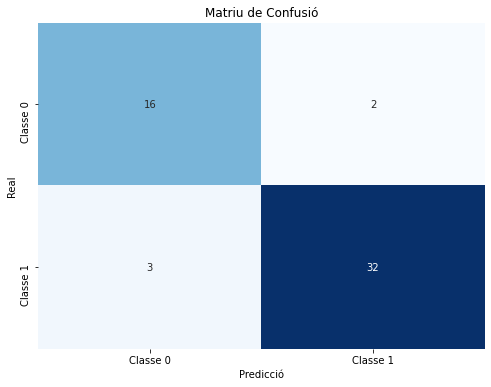

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.94      0.91      0.93        35

    accuracy                           0.91        53
   macro avg       0.89      0.90      0.90        53
weighted avg       0.91      0.91      0.91        53



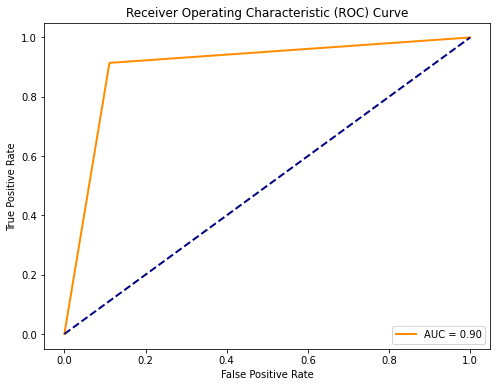

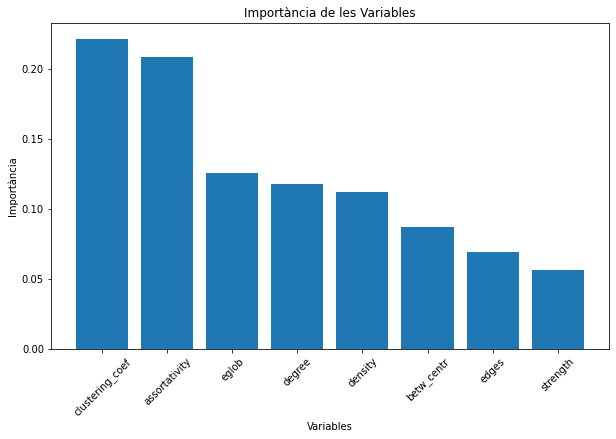


Scores de Accuracy RFC: [0.66037736 0.94339623 0.90566038 0.94339623 0.94339623]
Mitjana Accuracy RFC: 0.879245283018868


In [15]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# RANDOM FOREST CLASSIFIER
# Creem el model de Random Forest Classifier.
model_RFC = RandomForestClassifier(random_state=42)

# Entrenem el model utilitzant dades d'entrenament.
model_RFC.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_RFC.predict(X_test)

# Evaluem el model RFC.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model RFC.
importancia = model_RFC.feature_importances_

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_RFC, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy RFC:", cv_accuracy_scores)
print(f"Mitjana Accuracy RFC: {np.mean(cv_accuracy_scores)}")

* **Global: Support Vector Machine**

Training set - Features: (212, 8), Labels: (212,)
Testing set - Features: (53, 8) Labels: (53,)


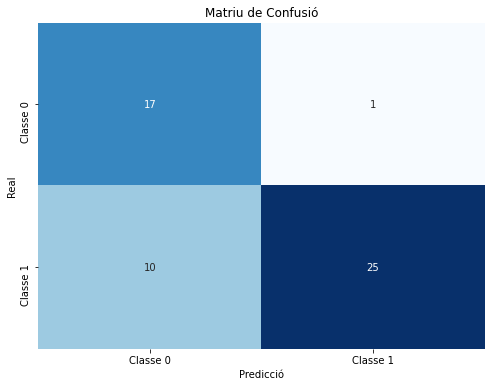

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.94      0.76        18
           1       0.96      0.71      0.82        35

    accuracy                           0.79        53
   macro avg       0.80      0.83      0.79        53
weighted avg       0.85      0.79      0.80        53



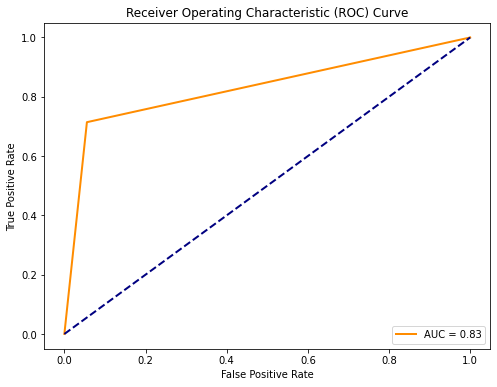

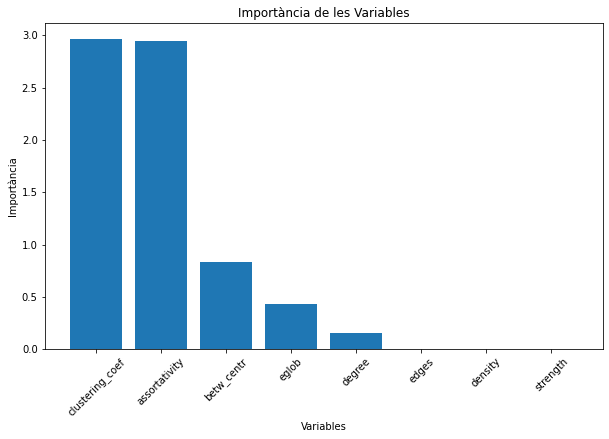


Scores de Accuracy SVM: [0.67924528 0.8490566  0.71698113 0.77358491 0.71698113]
Mitjana Accuracy SVM: 0.7471698113207547


In [16]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# Suppot Vector Machine (SVM).
# Creem el model de Suppor vector Machine.
model_SVM = SVC(kernel='linear')

# Entrenem el model utilitzant dades d'entrenament.
model_SVM.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_SVM.predict(X_test)

# Evaluem el model.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_SVM.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_SVM, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy SVM:", cv_accuracy_scores)
print(f"Mitjana Accuracy SVM: {np.mean(cv_accuracy_scores)}")

* **Global: KNN**

Training set - Features: (212, 8), Labels: (212,)
Testing set - Features: (53, 8) Labels: (53,)


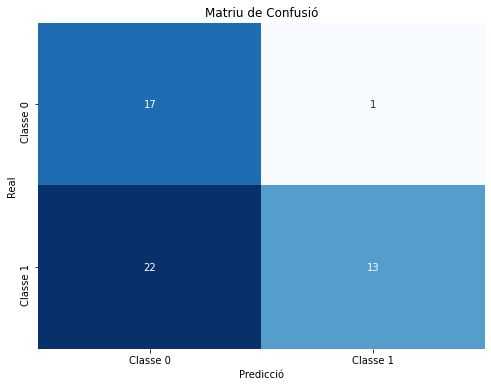

Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.94      0.60        18
           1       0.93      0.37      0.53        35

    accuracy                           0.57        53
   macro avg       0.68      0.66      0.56        53
weighted avg       0.76      0.57      0.55        53



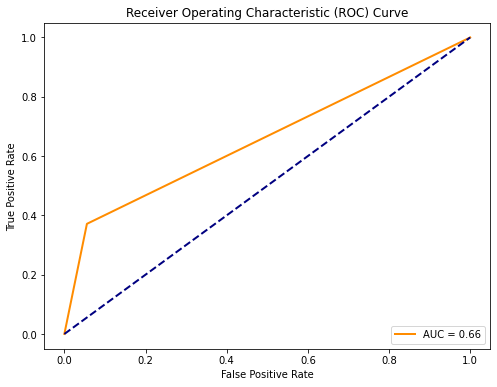


Scores de Accuracy KNN: [0.56603774 0.73584906 0.60377358 0.62264151 0.69811321]
Mitjana Accuracy KNN: 0.6452830188679245


In [17]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# KNN
# Se crea el modelo KNN.
model_KNN = KNeighborsClassifier(n_neighbors=2)

# Entrenem el model utilitzant dades d'entrenament.
model_KNN.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_KNN.predict(X_test)

# Evaluem el model KNN.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_KNN, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy KNN:", cv_accuracy_scores)
print(f"Mitjana Accuracy KNN: {np.mean(cv_accuracy_scores)}")

* **Global: Logistic Regression**

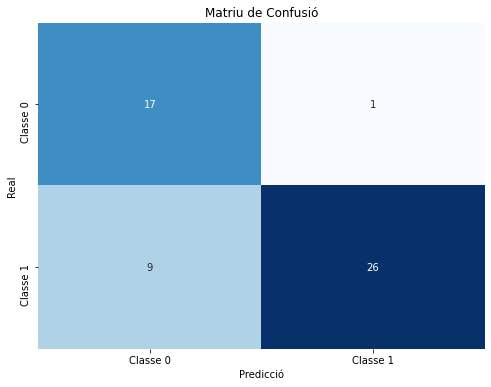

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.94      0.77        18
           1       0.96      0.74      0.84        35

    accuracy                           0.81        53
   macro avg       0.81      0.84      0.81        53
weighted avg       0.86      0.81      0.82        53



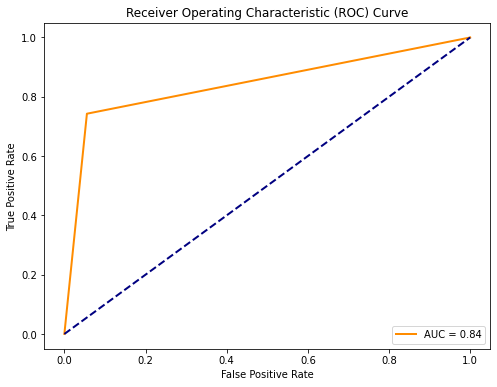

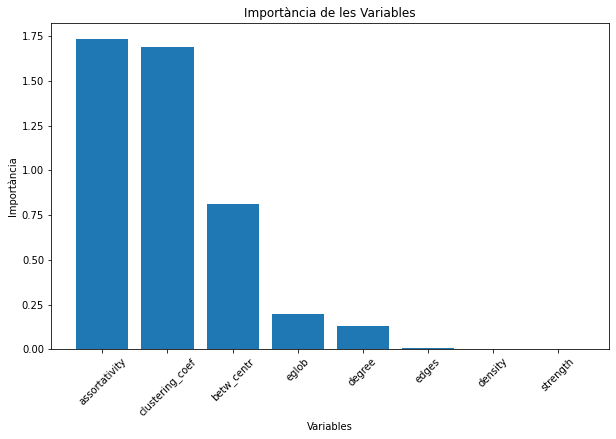


Scores de Accuracy LR: [0.71698113 0.81132075 0.71698113 0.75471698 0.69811321]
Mitjana Accuracy LR: 0.739622641509434


In [18]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Seleccionem les variables significatives.
X_selected_cols = df[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Logistic Regression
# Se crea el modelo Logistic Regression.
model_LR = LogisticRegression()

# Entrenem el model utilitzant dades d'entrenament.
model_LR.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_LR.predict(X_test)

# Evaluem el model Logistic Regression.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_LR.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_LR, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy LR:", cv_accuracy_scores)
print(f"Mitjana Accuracy LR: {np.mean(cv_accuracy_scores)}")

* **Global: Gaussian Naive Bayes**

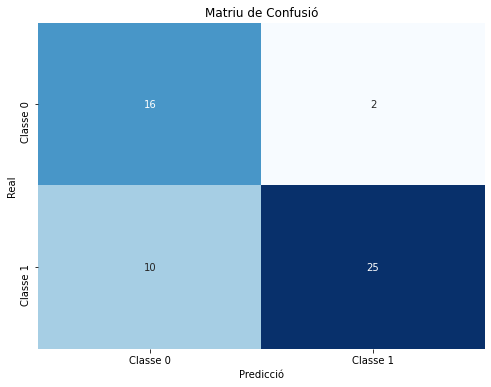

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.89      0.73        18
           1       0.93      0.71      0.81        35

    accuracy                           0.77        53
   macro avg       0.77      0.80      0.77        53
weighted avg       0.82      0.77      0.78        53



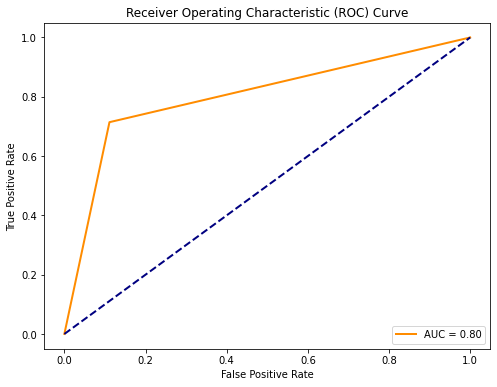


Scores de Accuracy GNB: [0.67924528 0.83018868 0.83018868 0.71698113 0.8490566 ]
Mitjana Accuracy GNB: 0.7811320754716982


In [19]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Seleccionem les variables significatives.
X_selected_cols = df[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
# Se crea el modelo Gaussian Naive Bayes.
model_GNB = GaussianNB()

# Entrenem el model utilitzant dades d'entrenament.
model_GNB.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_GNB.predict(X_test)

# Evaluem el model Gaussian Naive Bayes.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_GNB, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy GNB:", cv_accuracy_scores)
print(f"Mitjana Accuracy GNB: {np.mean(cv_accuracy_scores)}")

### Local Metrics

In [20]:
# Read CSV File.
file_metrics = 'table_metrics_local_functional.csv'
#file_metrics = 'table_metrics_local_structural.csv'
#file_metrics = 'table_metrics_local_morphological.csv'

df_local = pd.read_csv(os.path.join('/home/guillem/Downloads/', file_metrics))
df_local.head()


,Var1,Unnamed_0,id,redcap_event_name,controls_ms,dob,msonset,nrldate,age,sex,...,modularity_66,modularity_67,modularity_68,modularity_69,modularity_70,modularity_71,modularity_72,modularity_73,modularity_74,modularity_75
0,0,0.0,002MSVIS,year3_arm_1,1,04-Sep-1963,10-Jan-1993,16-Mar-2015,51.53,1.0,...,3,3,3,3,3,3,2,3,3,3
1,1,1.0,003MSVIS,year5_arm_1,1,18-Jan-1959,15-Jul-2007,08-Feb-2017,58.06,0.0,...,1,1,2,2,2,1,2,1,2,2
2,2,2.0,004MSVIS,year5_arm_1,1,16-Sep-1956,15-Sep-2010,29-Jun-2017,60.78,1.0,...,1,4,2,2,2,1,1,1,1,1
3,3,3.0,005MSVIS,year5_arm_1,1,01-Feb-1978,01-Aug-2007,13-Jan-2016,37.95,0.0,...,3,4,4,3,3,3,3,3,3,3
4,4,4.0,010MSVIS,year5_arm_1,1,13-Feb-1964,15-Sep-2007,04-Oct-2016,52.64,0.0,...,3,1,3,3,5,1,3,3,3,3


In [21]:
# Obtenim el llistat de mètriques locals.
# Get index of 'degree_0'.
index_of_degree0 = df_local.columns.get_loc('degree_0')
list_local_metrics = list(df_local.columns)[index_of_degree0:]


In [22]:
df_MS_local = df_local[df_local['controls_ms'] == 1]
df_HV_local = df_local[df_local['controls_ms'] == 0]

In [23]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Agafem les metriques que es diferencien significativament entre MS i HV per Correcció de Bonferroni.
alpha = 0.05

def check_normality(data, alpha):
    _, p_value = shapiro(data)
    return p_value > alpha

list_significative_metrics_local = list()
list_bonferroni_correction_local = dict()
num_matrius = len(df)

for metric in list_local_metrics:
    dades_HV = df_local[df_local['controls_ms'] == 0][metric]
    dades_MS = df_local[df_local['controls_ms'] == 1][metric]

    normalitat_MS = check_normality(dades_MS, alpha)
    normalitat_HV = check_normality(dades_HV, alpha)
    
    # Es comprova si les dades segueixen una distribució normal.
    if normalitat_MS and normalitat_HV:
        # Si HV i MS segueixen una distribució normal, utilitzem la prova t.
        _, pval = ttest_ind(dades_HV, dades_MS)
        
    # Si no segueixen una distribució normal.
    else:
        # S'utilitza la prova U de Mann-Whitney
        _, pval = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    
    # S'aplica la correció de bonferroni.
    pval_corrected = pval*num_matrius
    
    # Si el pvalue es menor de alpha.
    if pval_corrected <= alpha:
        print(f"Metric: {metric} pvalue: {pval_corrected}")
        list_bonferroni_correction_local[metric] = pval_corrected   
        list_significative_metrics_local.append(metric)
        

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Metric: degree_14 pvalue: 0.01398417943814438
Metric: degree_22 pvalue: 0.017967862883560587
Metric: degree_23 pvalue: 0.00016315425952130637
Metric: degree_33 pvalue: 0.0009175075234180674
Metric: degree_34 pvalue: 1.661625846652206e-07
Metric: degree_36 pvalue: 2.8384816723932417e-09
Metric: degree_37 pvalue: 0.0001234709986996129
Metric: degree_38 pvalue: 0.029034070657024555
Metric: degree_39 pvalue: 0.014134767054244435
Metric: degree_40 pvalue: 0.045426906111198775
Metric: degree_42 pvalue: 0.004906995527803792
Metric: degree_43 pvalue: 0.0046380725851571
Metric: degree_44 pvalue: 3.8630997990853865e-05
Metric: degree_55 pvalue: 0.011888496773168621
Metric: degree_58 pvalue: 2.673240703982826e-06
Metric: degree_60 pvalue: 1.3737608091251292e-05
Metric: degree_65 pvalue: 8.042435233014336e-05
Metric: degree_66 pvalue: 0.0014018696209358995
Metric: degree_68 pvalue: 4.39319183620792e-15
Metric: degree_72 pvalue: 1.9463822695640904e-05
Metric: degree_73 pvalue: 1.6818646979542034e-0

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: pager_centr_6 pvalue: 0.00016588290563277516
Metric: pager_centr_36 pvalue: 0.0025627468058069874
Metric: pager_centr_37 pvalue: 0.010414993052148115
Metric: pager_centr_41 pvalue: 0.0003970695617163476
Metric: pager_centr_43 pvalue: 0.00043386526934617494
Metric: pager_centr_44 pvalue: 7.334891386305117e-08
Metric: pager_centr_58 pvalue: 0.0015332327108844863
Metric: pager_centr_69 pvalue: 0.009917310631527758
Metric: pager_centr_74 pvalue: 0.013097748653837974
Metric: clust_coef_0 pvalue: 3.974992607520943e-17
Metric: clust_coef_1 pvalue: 6.610303068460634e-21
Metric: clust_coef_2 pvalue: 2.3674864476295546e-17
Metric: clust_coef_3 pvalue: 7.263492797872102e-05
Metric: clust_coef_4 pvalue: 1.4217327041115872e-16
Metric: clust_coef_5 pvalue: 1.2883957375799803e-19
Metric: clust_coef_6 pvalue: 5.013765786503968e-14
Metric: clust_coef_7 pvalue: 3.4344124964241516e-16
Metric: clust_coef_8 pvalue: 2.0770476504015e-22
Metric: clust_coef_9 pvalue: 4.501530868819682e-14
Metric: clust

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Metric: clust_coef_49 pvalue: 5.605165091132904e-05
Metric: clust_coef_50 pvalue: 1.6627995478599658e-06
Metric: clust_coef_51 pvalue: 2.5223548309857394e-09
Metric: clust_coef_53 pvalue: 7.763257647076433e-07
Metric: clust_coef_55 pvalue: 0.016575178258809678
Metric: clust_coef_56 pvalue: 0.009166754611789995
Metric: clust_coef_67 pvalue: 0.01504425524857015
Metric: clust_coef_68 pvalue: 0.011922477373331379
Metric: local_ef_0 pvalue: 5.030548247072413e-06
Metric: local_ef_1 pvalue: 7.397238686759191e-09
Metric: local_ef_2 pvalue: 4.053425332300672e-09
Metric: local_ef_4 pvalue: 0.00020146036343028113
Metric: local_ef_5 pvalue: 9.955480367451086e-12
Metric: local_ef_6 pvalue: 0.000995649866494615
Metric: local_ef_7 pvalue: 2.2976926930638846e-06
Metric: local_ef_8 pvalue: 2.804838810139669e-12
Metric: local_ef_9 pvalue: 3.5784768502720327e-07
Metric: local_ef_10 pvalue: 2.0744818346346964e-07
Metric: local_ef_11 pvalue: 5.603865677386438e-13
Metric: local_ef_12 pvalue: 0.0003603508336

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Metric: local_ef_29 pvalue: 5.031594544137256e-08
Metric: local_ef_30 pvalue: 4.538492594232501e-06
Metric: local_ef_35 pvalue: 0.04784871808260313
Metric: local_ef_39 pvalue: 0.003752489334281482
Metric: local_ef_44 pvalue: 7.078355815380359e-05
Metric: local_ef_45 pvalue: 5.4157836066755826e-08
Metric: local_ef_46 pvalue: 2.4210502368446184e-08
Metric: local_ef_47 pvalue: 6.29995744550788e-14
Metric: local_ef_49 pvalue: 9.306711251274662e-06
Metric: local_ef_50 pvalue: 3.9552502693390783e-07
Metric: local_ef_51 pvalue: 2.028970480189262e-08
Metric: local_ef_52 pvalue: 3.177319509435717e-05
Metric: local_ef_53 pvalue: 1.6997451412229511e-13
Metric: local_ef_54 pvalue: 8.106744949039954e-11
Metric: local_ef_55 pvalue: 7.680523045573423e-11
Metric: local_ef_56 pvalue: 3.8953195984123917e-10
Metric: local_ef_57 pvalue: 2.0858975878949652e-13
Metric: local_ef_58 pvalue: 5.487155648837041e-05
Metric: local_ef_59 pvalue: 2.1796037382651677e-09
Metric: local_ef_60 pvalue: 0.00369785018636518

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Metric: strength_18 pvalue: 0.008317934593580406
Metric: strength_19 pvalue: 1.528195436630552e-05
Metric: strength_21 pvalue: 0.00435974694688342
Metric: strength_27 pvalue: 0.0020459682785352712
Metric: strength_32 pvalue: 0.004171994846034841
Metric: strength_33 pvalue: 0.010509980689312155
Metric: strength_34 pvalue: 0.0009771082214936955
Metric: strength_36 pvalue: 6.944242944513011e-17
Metric: strength_37 pvalue: 2.712982049284976e-09
Metric: strength_42 pvalue: 9.24399001926906e-05
Metric: strength_44 pvalue: 0.0019738803769857502
Metric: strength_54 pvalue: 0.0007426498700785553
Metric: strength_60 pvalue: 0.0004522246340029187
Metric: strength_65 pvalue: 0.000751232630451634
Metric: strength_68 pvalue: 5.161426072177975e-13
Metric: strength_72 pvalue: 3.7617917700098554e-06
Metric: strength_73 pvalue: 6.904251678178599e-07
Metric: strength_74 pvalue: 4.283227734858305e-07
Metric: strength_75 pvalue: 1.2941820774198871e-05


In [24]:
# Mètriques amb diferències significatives entr eMS i HV.
list(list_bonferroni_correction_local.keys())

['degree_14',
 'degree_22',
 'degree_23',
 'degree_33',
 'degree_34',
 'degree_36',
 'degree_37',
 'degree_38',
 'degree_39',
 'degree_40',
 'degree_42',
 'degree_43',
 'degree_44',
 'degree_55',
 'degree_58',
 'degree_60',
 'degree_65',
 'degree_66',
 'degree_68',
 'degree_72',
 'degree_73',
 'degree_74',
 'degree_75',
 'betw_centr_20',
 'betw_centr_24',
 'betw_centr_25',
 'betw_centr_32',
 'betw_centr_33',
 'betw_centr_40',
 'betw_centr_44',
 'betw_centr_47',
 'betw_centr_50',
 'betw_centr_52',
 'betw_centr_57',
 'pager_centr_6',
 'pager_centr_36',
 'pager_centr_37',
 'pager_centr_41',
 'pager_centr_43',
 'pager_centr_44',
 'pager_centr_58',
 'pager_centr_69',
 'pager_centr_74',
 'clust_coef_0',
 'clust_coef_1',
 'clust_coef_2',
 'clust_coef_3',
 'clust_coef_4',
 'clust_coef_5',
 'clust_coef_6',
 'clust_coef_7',
 'clust_coef_8',
 'clust_coef_9',
 'clust_coef_10',
 'clust_coef_11',
 'clust_coef_12',
 'clust_coef_13',
 'clust_coef_14',
 'clust_coef_15',
 'clust_coef_16',
 'clust_coef_1

In [25]:
len(list_bonferroni_correction_local)

166

In [26]:
# Constructuct Table (as 'Table 2')
# HEADER: ('MS patients (N = XXX)', 'HV (N = YYY)', 'p value')
# Metrics:  
# 'degree': 0.36 (0.02)  0.34 (0.02)  < 0.001
# etc.

print("Metric  -  MS patients  -  HV volunteers  -  Pvalue")
for metric in list(list_bonferroni_correction_local.keys()):
    mean_MS_ = np.mean(df_MS_local[metric])
    std_MS_ = np.std(df_MS_local[metric])
    
    mean_HV_ = np.mean(df_MS_local[metric])
    std_HV_ = np.std(df_MS_local[metric])
    
    print(f'Metric - {metric}: MS: {mean_MS_} ({std_MS_}), HV: {mean_HV_} ({std_HV_}), Pvalue: {list_bonferroni_correction_local[metric]} \n')


Metric  -  MS patients  -  HV volunteers  -  Pvalue
Metric - degree_14: MS: 7.598639455782313 (1.90830574122195), HV: 7.598639455782313 (1.90830574122195), Pvalue: 0.01398417943814438 

Metric - degree_22: MS: 11.612244897959183 (2.2359127542878086), HV: 11.612244897959183 (2.2359127542878086), Pvalue: 0.017967862883560587 

Metric - degree_23: MS: 8.272108843537415 (2.242319690319661), HV: 8.272108843537415 (2.242319690319661), Pvalue: 0.00016315425952130637 

Metric - degree_33: MS: 9.27891156462585 (2.732476171203107), HV: 9.27891156462585 (2.732476171203107), Pvalue: 0.0009175075234180674 

Metric - degree_34: MS: 5.299319727891157 (2.217478392585506), HV: 5.299319727891157 (2.217478392585506), Pvalue: 1.661625846652206e-07 

Metric - degree_36: MS: 8.70748299319728 (2.494104298081932), HV: 8.70748299319728 (2.494104298081932), Pvalue: 2.8384816723932417e-09 

Metric - degree_37: MS: 12.129251700680273 (4.01404355962308), HV: 12.129251700680273 (4.01404355962308), Pvalue: 0.0001234


Metric - local_ef_54: MS: 0.3437457100282042 (0.03571170245740152), HV: 0.3437457100282042 (0.03571170245740152), Pvalue: 8.106744949039954e-11 

Metric - local_ef_55: MS: 0.39486458160287974 (0.03149735397377526), HV: 0.39486458160287974 (0.03149735397377526), Pvalue: 7.680523045573423e-11 

Metric - local_ef_56: MS: 0.353062405074013 (0.03463077979872637), HV: 0.353062405074013 (0.03463077979872637), Pvalue: 3.8953195984123917e-10 

Metric - local_ef_57: MS: 0.3266012727277622 (0.025540343389252877), HV: 0.3266012727277622 (0.025540343389252877), Pvalue: 2.0858975878949652e-13 

Metric - local_ef_58: MS: 0.27441840825944464 (0.055867033726466564), HV: 0.27441840825944464 (0.055867033726466564), Pvalue: 5.487155648837041e-05 

Metric - local_ef_59: MS: 0.3759161789047227 (0.0281554941563016), HV: 0.3759161789047227 (0.0281554941563016), Pvalue: 2.1796037382651677e-09 

Metric - local_ef_60: MS: 0.34846211622095546 (0.030392223908503276), HV: 0.34846211622095546 (0.030392223908503276)

* **Local: Random Forest Classifier**

Training set - Features: (212, 166), Labels: (212,)
Testing set - Features: (53, 166) Labels: (53,)


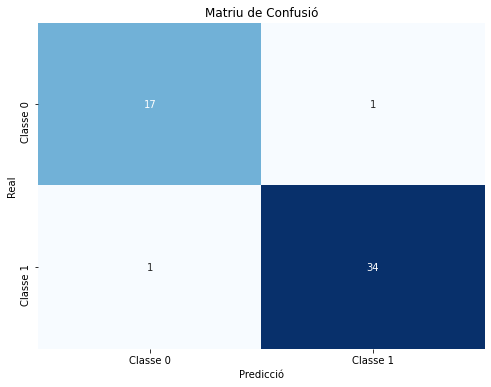

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.97      0.97      0.97        35

    accuracy                           0.96        53
   macro avg       0.96      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53



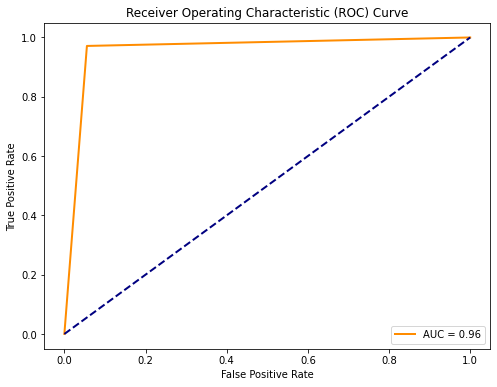

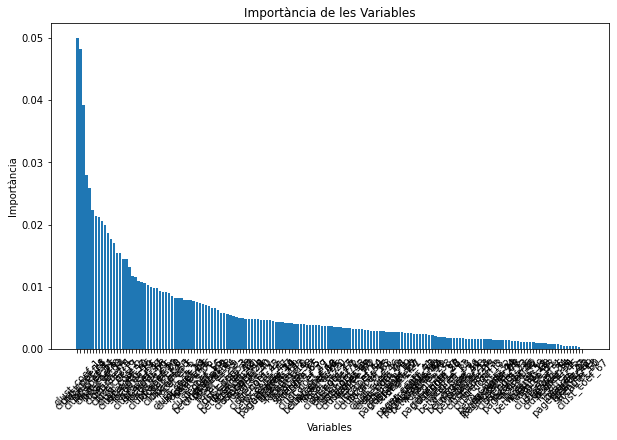


Scores de Accuracy RFC: [0.64150943 0.9245283  0.98113208 1.         1.        ]
Mitjana Accuracy RFC: 0.909433962264151


In [28]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# RANDOM FOREST CLASSIFIER
# Creem el model de Random Forest Classifier.
model_RFC = RandomForestClassifier(random_state=42)

# Entrenem el model utilitzant dades d'entrenament.
model_RFC.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_RFC.predict(X_test)

# Evaluem el model RFC.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model RFC.
importancia = model_RFC.feature_importances_

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_RFC, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy RFC:", cv_accuracy_scores)
print(f"Mitjana Accuracy RFC: {np.mean(cv_accuracy_scores)}")

* **Local: Support Vector Machine (SVM)**

Training set - Features: (212, 166), Labels: (212,)
Testing set - Features: (53, 166) Labels: (53,)


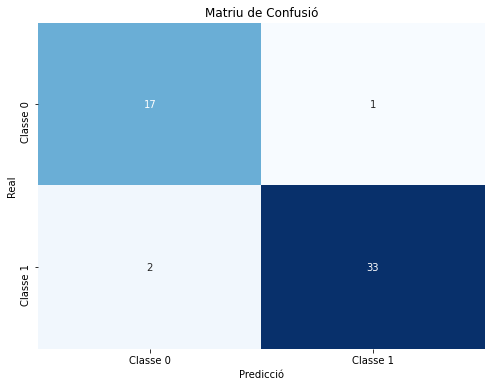

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.97      0.94      0.96        35

    accuracy                           0.94        53
   macro avg       0.93      0.94      0.94        53
weighted avg       0.94      0.94      0.94        53



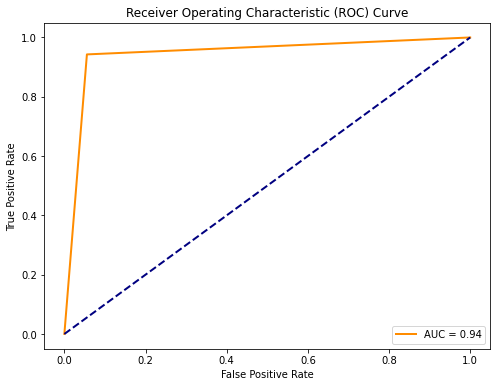

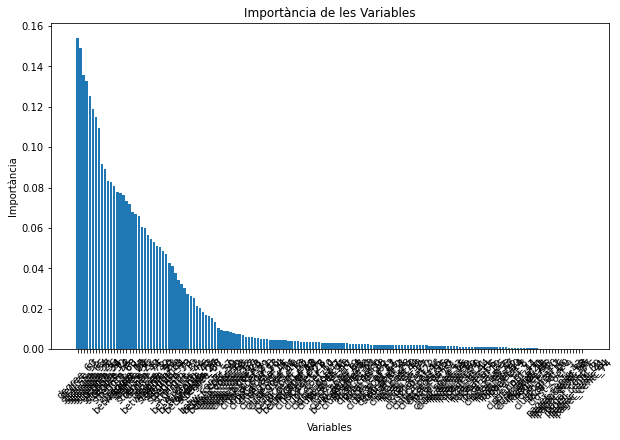


Scores de Accuracy SVM: [0.86792453 0.94339623 0.90566038 0.9245283  0.94339623]
Mitjana Accuracy SVM: 0.9169811320754718


In [29]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# Suppot Vector Machine (SVM).
# Creem el model de Suppor vector Machine.
model_SVM = SVC(kernel='linear')

# Entrenem el model utilitzant dades d'entrenament.
model_SVM.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_SVM.predict(X_test)

# Evaluem el model.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_SVM.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_SVM, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy SVM:", cv_accuracy_scores)
print(f"Mitjana Accuracy SVM: {np.mean(cv_accuracy_scores)}")

* **Local: KNN** 

Training set - Features: (212, 166), Labels: (212,)
Testing set - Features: (53, 166) Labels: (53,)


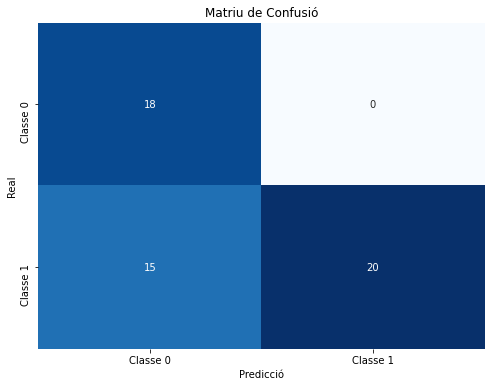

Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       1.00      0.57      0.73        35

    accuracy                           0.72        53
   macro avg       0.77      0.79      0.72        53
weighted avg       0.85      0.72      0.72        53



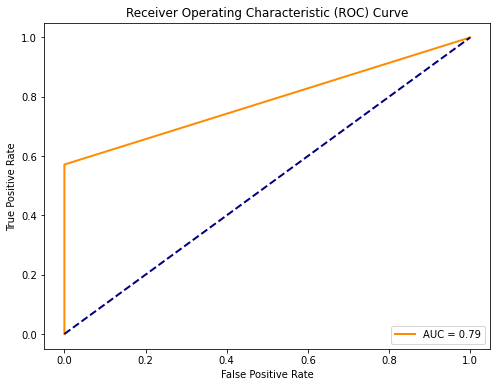


Scores de Accuracy KNN: [0.71698113 0.79245283 0.71698113 0.77358491 0.81132075]
Mitjana Accuracy KNN: 0.7622641509433963


In [31]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# KNN
# Se crea el modelo KNN.
model_KNN = KNeighborsClassifier(n_neighbors=2)

# Entrenem el model utilitzant dades d'entrenament.
model_KNN.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_KNN.predict(X_test)

# Evaluem el model KNN.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_KNN, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy KNN:", cv_accuracy_scores)
print(f"Mitjana Accuracy KNN: {np.mean(cv_accuracy_scores)}")

* **Local: Logistic regression**

/home/guillem/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


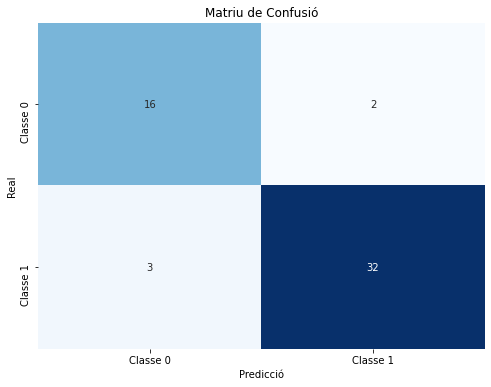

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.94      0.91      0.93        35

    accuracy                           0.91        53
   macro avg       0.89      0.90      0.90        53
weighted avg       0.91      0.91      0.91        53



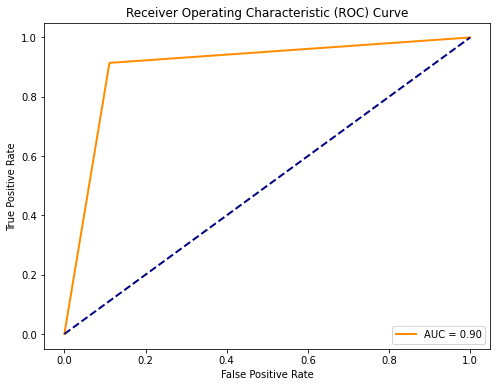

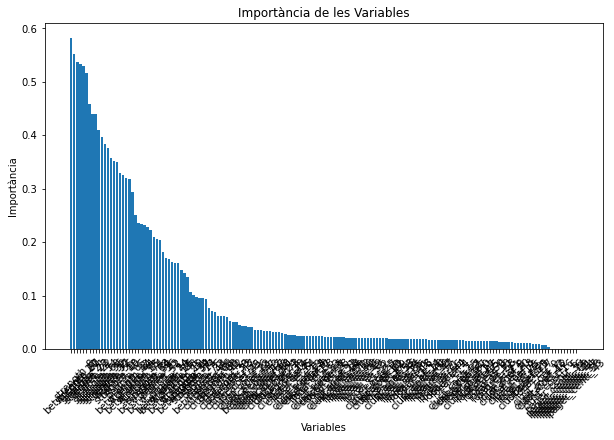

/home/guillem/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/guillem/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

Scores de Accuracy LR: [0.83018868 0.94339623 0.86792453 0.9245283  0.9245283 ]
Mitjana Accuracy LR: 0.8981132075471698


/home/guillem/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/guillem/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

In [32]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Logistic Regression
# Se crea el modelo Logistic Regression.
model_LR = LogisticRegression()

# Entrenem el model utilitzant dades d'entrenament.
model_LR.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_LR.predict(X_test)

# Evaluem el model Logistic Regression.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_LR.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_LR, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy LR:", cv_accuracy_scores)
print(f"Mitjana Accuracy LR: {np.mean(cv_accuracy_scores)}")

* **Local: Gaussian Naive Bayes (GNB)**

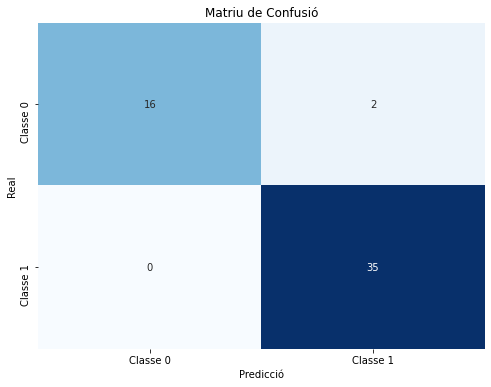

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.95      1.00      0.97        35

    accuracy                           0.96        53
   macro avg       0.97      0.94      0.96        53
weighted avg       0.96      0.96      0.96        53



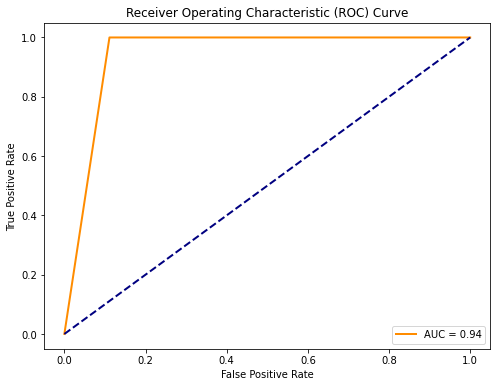


Scores de Accuracy GNB: [0.66037736 0.98113208 1.         1.         1.        ]
Mitjana Accuracy GNB: 0.9283018867924528


In [33]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
# Se crea el modelo Gaussian Naive Bayes.
model_GNB = GaussianNB()

# Entrenem el model utilitzant dades d'entrenament.
model_GNB.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_GNB.predict(X_test)

# Evaluem el model Gaussian Naive Bayes.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_GNB, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy GNB:", cv_accuracy_scores)
print(f"Mitjana Accuracy GNB: {np.mean(cv_accuracy_scores)}")

* Clinical and demographic characteristics of the subjects included in the study.

In [55]:
# Construct Table 1 (Clinic and demographic characteristics of the subjects).

demographic_features_variables = ['sex', 'age']
demographic_features_variables_dict = dict()

for var in demographic_features_variables:
    dades_HV = df_HV[var]
    dades_MS = df_MS[var]

    normalitat_HV = check_normality(dades_HV, 0.05)
    normalitat_MS = check_normality(dades_MS, 0.05)
    
    if normalitat_HV and normalitat_MS:
        _, pvalue_t = ttest_ind(dades_HV, dades_MS)
        #print("pvalue_t:", pvalue_t)
        demographic_features_variables_dict[var] = pvalue_t
    
    # Prova mostres independents.
    else:
        _, pvalue_u = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
        #print("pvalue_u:", pvalue_u)
        demographic_features_variables_dict[var] = pvalue_u
        

In [56]:
# RRMS: 0, SPMS: 1, PPMS (2)
RRMS = df_MS[df_MS['mstype'] == 0].count()['mstype']
SPMS = df_MS[df_MS['mstype'] == 1].count()['mstype']
PPMS = df_MS[df_MS['mstype'] == 2].count()['mstype']

perc_RRMS = RRMS/len(list(df_MS['mstype']))
perc_SPMS = SPMS/len(list(df_MS['mstype']))
perc_PPMS = PPMS/len(list(df_MS['mstype']))


In [57]:
# Obtenim la mitjana de volum de tots els nodes Controls.
# Llegir excel.
volum_df_HV = pd.read_excel('VOLUM_NODES_CONTROLS.xls')

# Calculem la mitjana de tots els nodes.
column_avg_HV = volum_df_HV.mean()
avg_volum_HV = column_avg_HV.mean()
std_volum_HV = column_avg_HV.std()


# Obtenim la mitjana de volum de tots els nodes MS.
# Llegir excel.
volum_df_MS = pd.read_excel('VOLUM_NODES_PATIENTS.xls')

# Calculem la mitjana de tots els nodes.
column_avg_MS = volum_df_MS.mean()
avg_volum_MS = column_avg_MS.mean()
std_volum_MS = column_avg_MS.std()

# Comprovem la normalitat i calculem el pvalue.
dades_HV = column_avg_HV
dades_MS = column_avg_MS

normalitat_HV = check_normality(dades_HV, 0.05)
normalitat_MS = check_normality(dades_MS, 0.05)

if normalitat_HV and normalitat_MS:
    _, pvalue_volum = ttest_ind(dades_HV, dades_MS)
    print("pvalue_t:", pvalue_volum)

# Prova mostres independents.
else:
    _, pvalue_volum = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    print("pvalue_u:", pvalue_volum)
    

pvalue_u: 0.4622499461255427


In [58]:
print("          'MS patients'     'HV volunteers'    'Pvalue'\n")
print(f"Female (N, %): {(df_MS['sex'] == 0).sum()} ({(df_MS['sex'] == 0).sum()/len(list(df_MS['sex']))}), {(df_HV['sex'] == 0).sum()} ({(df_HV['sex'] == 0).sum()/len(list(df_HV['sex']))}) pvalue: {demographic_features_variables_dict['sex']}")
print(f"Age (years): {np.mean(df_MS['age'])} ({np.std(df_MS['age'])}), {np.mean(df_HV['age'])} ({np.std(df_HV['age'])}), pvalue: {demographic_features_variables_dict['age']}\n")
print("Type of MS:")
print(f"RRMS: {RRMS} ({perc_RRMS})  na  na")
print(f"SPMS: {SPMS} ({perc_SPMS})  na  na")
print(f"PPMS: {PPMS} ({perc_PPMS})  na  na\n")
print(f"Avg Node volum: {avg_volum_MS}, {avg_volum_HV}, p_value: {pvalue_volum}")
print(f"Disease Duration: {np.mean(df_MS['dd'])} ({np.std(df_MS['dd'])}),   na   na  ")
print(f"EDSS Score (gravetat): {np.mean(df_MS['edss'])} ({np.std(df_MS['edss'])}),   na   na  ")
print(f"zSDMT: {np.mean(df_MS['sdmtz'])} ({np.std(df_MS['sdmtz'])}),   na   na  ")
print(f"zPASAT: {np.mean(df_MS['zpasat'])} ({np.std(df_MS['zpasat'])}),   na   na  ")
print(f"zAttention: {np.mean(df_MS['zattention'])} ({np.std(df_MS['zattention'])}),   na   na  ")


          'MS patients'     'HV volunteers'    'Pvalue'

Female (N, %): 104 (0.7074829931972789), 99 (0.8389830508474576) pvalue: 0.01216832937605819
Age (years): 47.33013605442177 (10.110612797350703), 36.61790630466201 (3.6448028929959047), pvalue: 8.388594573473506e-24

Type of MS:
RRMS: 125 (0.8503401360544217)  na  na
SPMS: 16 (0.10884353741496598)  na  na
PPMS: 6 (0.04081632653061224)  na  na

Avg Node volum: 8635.448684210527, 9328.701754385966, p_value: 0.4622499461255427
Disease Duration: 15.961088435374148 (9.01906326713972),   na   na  
EDSS Score (gravetat): 2.6598639455782314 (1.6892883766794917),   na   na  
zSDMT: 0.07902865573770491 (1.0603561342433823),   na   na  
zPASAT: -0.2892552 (1.3281360383373986),   na   na  
zAttention: -0.2857193548387097 (1.0301272962112904),   na   na  


### Visualització en 3D cerebral amb representació dels nodes

In [59]:
# Llegim el fitxer.
df_nodes_coordinates = pd.read_table('Node_mindboggle_default.node', header = None)
df_nodes_coordinates.rename(columns={0: "x", 1: "y", 2: "z", 5: "node_name"}, inplace = True)
df_nodes_coordinates.head()

,x,y,z,3,4,node_name
0,-4.28,16.90,28.3,2,1,ctx-lh-caudalanteriorcingulate
1,-35.20,12.00,46.5,3,1,ctx-lh-caudalmiddlefrontal
2,-6.44,-87.50,25.5,4,1,ctx-lh-cuneus
3,-22.20,-4.61,-35.8,5,1,ctx-lh-entorhinal
4,-33.30,-41.70,-21.6,6,1,ctx-lh-fusiform


In [60]:
# Create an example adjacency matrix (replace this with your own matrix)
matrix = pd.read_csv(
    os.path.join(
        os.getcwd(), 'subject_networks_rfMRI_v1', '002MSVIS_r_matrix.csv'
    ), header=None
)
adjacency_matrix = np.array(matrix)


In [61]:
# Construim el llistat de coordenades de cada node.
node_coordinates = list()

for i in range(0, 76):
    node_name = dict_data[str(i)]
    filtered_df = df_nodes_coordinates[df_nodes_coordinates['node_name'] == node_name]
    node_coordinates.append([float(filtered_df['x']), float(filtered_df['y']), float(filtered_df['z'])])
    

/home/guillem/.local/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


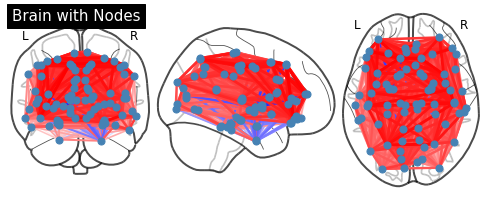

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting
from nilearn.connectome import ConnectivityMeasure

# Visualització en 3D cerebral amb representació dels nodes.
plotting.plot_connectome(
    adjacency_matrix=adjacency_matrix,
    node_coords=node_coordinates,
    node_color='steelblue',
    title='Brain with Nodes',
    display_mode='ortho',
    annotate=True,
)
plt.show()